# **Bayesian Inference - Estimating a Star’s Mass**
Bayesian inference updates our belief about a parameter (e.g., stellar mass) given prior knowledge and new observations using **Bayes’ Theorem**:

\begin{align}
P(H|D) = \frac{P(D|H) P(H)}{P(D)}
\end{align}

where:

* P(H∣D) = **Posterior** (updated probability after seeing data)
* P(D∣H) = **Likelihood** (probability of data given hypothesis)
* P(H) = **Prior** (initial belief before seeing data)
* P(D) = **Normalization constant** (total probability of data)

**Why Use Bayesian Methods?**

* Allows incorporation of prior knowledge.
* Helps refine estimates in cases of incomplete or noisy data.

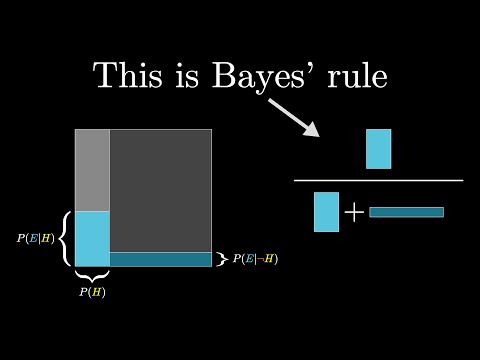

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo, display

display(YouTubeVideo("HZGCoVF3YvM", width=800, height=450))

## **Mass-Luminosity Relation:**

For main-sequence stars:
\begin{align}
L \propto M^{3.5}
\end{align}

This notebook shows a simple Bayesian update to estimate a star's mass given an observed luminosity.

Key pieces:
- Prior: your initial belief about mass (we demonstrate several priors).
- Likelihood: probability of the observed luminosity given a mass model, here using L = M^{3.5} with Gaussian scatter (sigma set by `likelihood_std_dev`).
- Posterior: proportional to prior × likelihood; normalized to integrate to 1.

What to look for:
- How different priors change the posterior.
- How the likelihood width (measurement uncertainty) influences the posterior.


## Example 1: Bayesian Inference with Prior 1 (Normal Distribution)

In [ ]:
# Prior 1: Normal distribution
mass_prior_1 = np.random.normal(1, 0.2, 10000)  # Normal distribution, mean=1, std=0.2

# Likelihood: Follows the mass-luminosity relation L ~ M^3.5
luminosity_observed = 5.0  # Assume observed luminosity is 5 times the Sun's
likelihood_std_dev = 0.5 # Standard deviation for the likelihood

# Calculate posterior for prior 1
valid_mass_1 = mass_prior_1[mass_prior_1 > 0]
likelihood_1 = np.exp(-0.5 * ((luminosity_observed - valid_mass_1**3.5)**2) / likelihood_std_dev**2)
posterior_1 = likelihood_1 * valid_mass_1  # Bayesian update
if np.sum(posterior_1) > 0:
  posterior_1 /= np.sum(posterior_1)  # Normalize
else:
  posterior_1 = np.zeros_like(valid_mass_1)

# Plot posterior distribution for prior 1
plt.figure(figsize=(8, 5))
plt.hist(valid_mass_1, bins=50, weights=posterior_1, color='green', alpha=0.7, label='Prior 1 (Normal, mean=1, std=0.2)')
plt.xlabel("Mass (Solar Masses)")
plt.xlim(1, 2)
plt.ylabel("Probability Density")
plt.title("Bayesian Inference of Star Mass with Prior 1")
plt.legend()
plt.show()

## Example 2: Bayesian Inference with Prior 2 (Uniform Distribution)

In [ ]:
# Prior 2: Uniform distribution
mass_prior_2 = np.random.uniform(0.5, 2.0, 10000) # Uniform distribution, min=0.5, max=2.0

# Calculate posterior for prior 2
valid_mass_2 = mass_prior_2[mass_prior_2 > 0]
likelihood_2 = np.exp(-0.5 * ((luminosity_observed - valid_mass_2**3.5)**2) / likelihood_std_dev**2)
posterior_2 = likelihood_2 * valid_mass_2  # Bayesian update
if np.sum(posterior_2) > 0:
  posterior_2 /= np.sum(posterior_2)  # Normalize
else:
  posterior_2 = np.zeros_like(valid_mass_2)

# Plot posterior distribution for prior 2
plt.figure(figsize=(8, 5))
plt.hist(valid_mass_2, bins=50, weights=posterior_2, color='blue', alpha=0.7, label='Prior 2 (Uniform, min=0.5, max=2.0)')
#plt.hist(valid_mass_1, bins=50, weights=posterior_1, color='green', alpha=0.7, label='Prior 1 (Normal, mean=1, std=0.2)')
plt.xlabel("Mass (Solar Masses)")
plt.xlim(1, 2)
plt.ylabel("Probability Density")
plt.title("Bayesian Inference of Star Mass with Prior 2")
plt.legend()
plt.show()

## Example 3: Bayesian Inference with Prior 3 (Normal Distribution)

In [ ]:
# Prior 3: Normal distribution
mass_prior_3 = np.random.normal(1.2, 0.1, 10000) # Normal distribution, mean=1.2, std=0.1

# Calculate posterior for prior 3
valid_mass_3 = mass_prior_3[mass_prior_3 > 0]
likelihood_3 = np.exp(-0.5 * ((luminosity_observed - valid_mass_3**3.5)**2) / likelihood_std_dev**2)
posterior_3 = likelihood_3 * valid_mass_3  # Bayesian update
if np.sum(posterior_3) > 0:
  posterior_3 /= np.sum(posterior_3)  # Normalize
else:
  posterior_3 = np.zeros_like(valid_mass_3)

# Plot posterior distribution for prior 3
plt.figure(figsize=(8, 5))
plt.hist(valid_mass_3, bins=50, weights=posterior_3, color='red', alpha=0.7, label='Prior 3 (Normal, mean=1.2, std=0.1)')
plt.xlabel("Mass (Solar Masses)")
plt.xlim(1, 2)
plt.ylabel("Probability Density")
plt.title("Bayesian Inference of Star Mass with Prior 3")
plt.legend()
plt.show()

## Combined Posterior Distributions

In [ ]:
# Plot posterior distribution for all priors
plt.figure(figsize=(10, 7))
plt.hist(valid_mass_1, bins=50, weights=posterior_1, color='green', alpha=0.5, label='Prior 1 (Normal, mean=1, std=0.2)')
plt.hist(valid_mass_2, bins=50, weights=posterior_2, color='blue', alpha=0.5, label='Prior 2 (Uniform, min=0.5, max=2.0)')
plt.hist(valid_mass_3, bins=50, weights=posterior_3, color='red', alpha=0.5, label='Prior 3 (Normal, mean=1.2, std=0.1)')

plt.xlabel("Mass (Solar Masses)")
plt.ylabel("Probability Density")
plt.xlim(1, 2)
plt.title("Bayesian Inference of Star Mass with Different Priors")
plt.legend()
plt.show()